## Evaluation of Group Recommendation Algorithms with Aggregation Strategy: "Dictatorship"

In this analysis, social context parameters were not used during the generation of individualized predictions. Instead, Item-Item collaborative filtering was used for both the base recommender and the social recommender. For the social recommender, the social context attributes were only used during the group prediction phase (during the individual prediction aggregation phase). The group recommendation was set to the predicted value for the "dictator" user. The dictator was chosen based on a certain social context attribute (e.g. The user with the highest tie strength value, or the highest social hierarchy value, and so on...)

### Loading recommendation output and test data

In [13]:
## Load Statistics
from lenskit import topn
from lenskit.metrics.topn import ndcg
import pandas as pd
from matplotlib import pyplot as plt
from lenskit.metrics.predict import rmse
from IPython.display import set_matplotlib_formats


# Load results files: n = 100
recs100 = pd.read_csv('output/DICTATORSHIP-100/recs.csv')
test_data100 = pd.read_csv('output/DICTATORSHIP-100/testdata.csv')
preds100 = pd.read_csv('output/DICTATORSHIP-100/preds.csv')

# Load results files: n = 10
recs10 = pd.read_csv('output/DICTATORSHIP-10/recs.csv')
test_data10 = pd.read_csv('output/DICTATORSHIP-10/testdata.csv')
preds10 = pd.read_csv('output/DICTATORSHIP-10/preds.csv')

# Load results files: n = 5
recs5 = pd.read_csv('output/DICTATORSHIP-5/recs.csv')
test_data5 = pd.read_csv('output/DICTATORSHIP-5/testdata.csv')
preds5 = pd.read_csv('output/DICTATORSHIP-5/preds.csv')

# Load results files: n = 3
recs3 = pd.read_csv('output/DICTATORSHIP-3/recs.csv')
test_data3 = pd.read_csv('output/DICTATORSHIP-3/testdata.csv')
preds3 = pd.read_csv('output/DICTATORSHIP-3/preds.csv')

### 1. Recommendation Metrics: Normalized Discounted Cummulative Gain: nDCG

In [14]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.ndcg)
rla.add_metric(topn.precision)
rla.add_metric(topn.recall)

results100 = rla.compute(recs100, test_data100)
ndcg100 = results100.groupby('Algorithm').ndcg.mean()
precision100 = results100.groupby('Algorithm').precision.mean()
recall100 = results100.groupby('Algorithm').recall.mean()

results10 = rla.compute(recs10, test_data10)
ndcg10 = results10.groupby('Algorithm').ndcg.mean()
precision10 = results10.groupby('Algorithm').precision.mean()
recall10 = results10.groupby('Algorithm').recall.mean()

results5 = rla.compute(recs5, test_data5)
ndcg5 = results5.groupby('Algorithm').ndcg.mean()
precision5 = results5.groupby('Algorithm').precision.mean()
recall5 = results5.groupby('Algorithm').recall.mean()

results3 = rla.compute(recs3, test_data3)
ndcg3 = results3.groupby('Algorithm').ndcg.mean()
precision3 = results3.groupby('Algorithm').precision.mean()
recall3 = results3.groupby('Algorithm').recall.mean()

In [15]:

df = pd.DataFrame({'Algorithm':ndcg100.index, 'ndcg':ndcg100.values, 'n':100})
ndcg_df = pd.concat([df, pd.DataFrame({'Algorithm':ndcg10.index, 'ndcg':ndcg10.values, 'n':10}), pd.DataFrame({'Algorithm':ndcg5.index, 'ndcg':ndcg5.values, 'n':5}), pd.DataFrame({'Algorithm':ndcg3.index, 'ndcg':ndcg3.values, 'n':3})], ignore_index=True)
print(ndcg_df.sort_values(by=['n', 'ndcg'], ascending=False))



Algorithm      ndcg    n
2   ii-hierch  0.048793  100
0          ii  0.043982  100
6   ii-soxsim  0.043632  100
4    ii-socap  0.042682  100
8     ii-trst  0.042336  100
5   ii-socsim  0.042295  100
1    ii-domex  0.042247  100
7     ii-symp  0.041174  100
3      ii-rel  0.039384  100
14  ii-socsim  0.035052   10
17    ii-trst  0.034486   10
15  ii-soxsim  0.032690   10
12     ii-rel  0.031880   10
9          ii  0.029936   10
11  ii-hierch  0.029416   10
13   ii-socap  0.026974   10
16    ii-symp  0.025798   10
10   ii-domex  0.024227   10
18         ii  0.035653    5
19   ii-domex  0.029306    5
25    ii-symp  0.026677    5
23  ii-socsim  0.024849    5
24  ii-soxsim  0.023810    5
26    ii-trst  0.021920    5
22   ii-socap  0.019841    5
20  ii-hierch  0.016912    5
21     ii-rel  0.013983    5
30     ii-rel  0.020880    3
28   ii-domex  0.012944    3
29  ii-hierch  0.012944    3
31   ii-socap  0.012944    3
35    ii-trst  0.012944    3
27         ii  0.007937    3
32  ii-socsim  0.0

/Users/safey.halim/.local/share/virtualenvs/gurator-eval-3p0ORahF/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


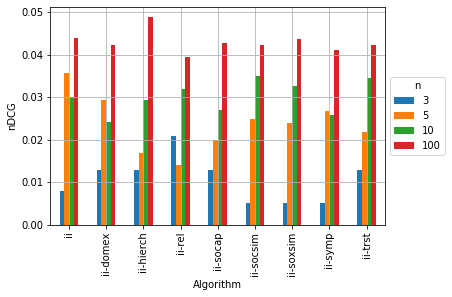

In [16]:
ndcg_df.pivot("Algorithm", "n", "ndcg").plot(kind='bar')

ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='n')
ax.grid(zorder=0)
plt.ylabel('nDCG')
plt.show()

## Precision at n

In [17]:
df = pd.DataFrame({'Algorithm':precision100.index, 'precision':precision100.values, 'n':100})
precision_df = pd.concat([df, pd.DataFrame({'Algorithm':precision10.index, 'precision':precision10.values, 'n':10}), pd.DataFrame({'Algorithm':precision5.index, 'precision':precision5.values, 'n':5}), pd.DataFrame({'Algorithm':precision3.index, 'precision':precision3.values, 'n':3})], ignore_index=True)
print(precision_df.sort_values(by=['n', 'precision'], ascending=False))

Algorithm  precision    n
8     ii-trst   0.002143  100
2   ii-hierch   0.002063  100
5   ii-socsim   0.002063  100
3      ii-rel   0.001984  100
4    ii-socap   0.001984  100
7     ii-symp   0.001984  100
0          ii   0.001825  100
6   ii-soxsim   0.001825  100
1    ii-domex   0.001746  100
14  ii-socsim   0.007143   10
15  ii-soxsim   0.007143   10
9          ii   0.006349   10
12     ii-rel   0.006349   10
17    ii-trst   0.006349   10
11  ii-hierch   0.005556   10
13   ii-socap   0.005556   10
10   ii-domex   0.004762   10
16    ii-symp   0.004762   10
18         ii   0.009524    5
19   ii-domex   0.009524    5
25    ii-symp   0.007937    5
23  ii-socsim   0.006349    5
24  ii-soxsim   0.006349    5
26    ii-trst   0.006349    5
20  ii-hierch   0.004762    5
21     ii-rel   0.004762    5
22   ii-socap   0.004762    5
30     ii-rel   0.007937    3
28   ii-domex   0.005291    3
29  ii-hierch   0.005291    3
31   ii-socap   0.005291    3
35    ii-trst   0.005291    3
27         ii 

/Users/safey.halim/.local/share/virtualenvs/gurator-eval-3p0ORahF/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


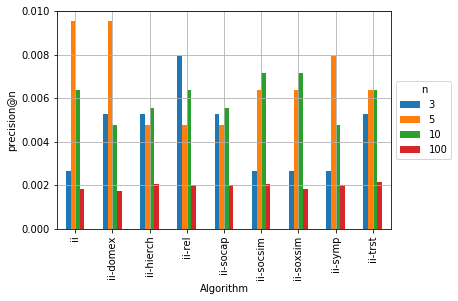

In [18]:
precision_df.pivot("Algorithm", "n", "precision").plot(kind='bar')

ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='n')
ax.grid(zorder=0)
plt.ylabel('precision@n')
plt.show()

## Recall at n

In [19]:
df = pd.DataFrame({'Algorithm':recall100.index, 'recall':recall100.values, 'n':100})
recall_df = pd.concat([df, pd.DataFrame({'Algorithm':recall10.index, 'recall':recall10.values, 'n':10}), pd.DataFrame({'Algorithm':recall5.index, 'recall':recall5.values, 'n':5}), pd.DataFrame({'Algorithm':recall3.index, 'recall':recall3.values, 'n':3})], ignore_index=True)
print(recall_df.sort_values(by=['n', 'recall'], ascending=False))

Algorithm    recall    n
8     ii-trst  0.202381  100
2   ii-hierch  0.194444  100
5   ii-socsim  0.194444  100
3      ii-rel  0.186508  100
4    ii-socap  0.186508  100
7     ii-symp  0.186508  100
0          ii  0.170635  100
6   ii-soxsim  0.170635  100
1    ii-domex  0.162698  100
14  ii-socsim  0.063492   10
15  ii-soxsim  0.063492   10
9          ii  0.059524   10
12     ii-rel  0.055556   10
17    ii-trst  0.055556   10
11  ii-hierch  0.047619   10
13   ii-socap  0.047619   10
16    ii-symp  0.043651   10
10   ii-domex  0.039683   10
18         ii  0.047619    5
19   ii-domex  0.047619    5
25    ii-symp  0.039683    5
23  ii-socsim  0.031746    5
24  ii-soxsim  0.031746    5
26    ii-trst  0.031746    5
20  ii-hierch  0.023810    5
21     ii-rel  0.023810    5
22   ii-socap  0.023810    5
30     ii-rel  0.023810    3
28   ii-domex  0.015873    3
29  ii-hierch  0.015873    3
31   ii-socap  0.015873    3
35    ii-trst  0.015873    3
27         ii  0.007937    3
32  ii-socsim  0.0

/Users/safey.halim/.local/share/virtualenvs/gurator-eval-3p0ORahF/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


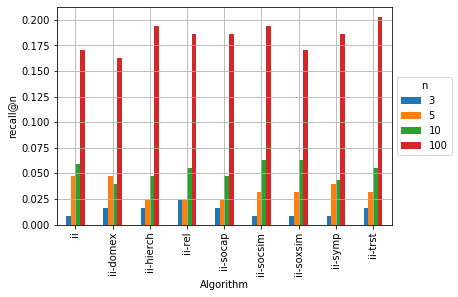

In [20]:
recall_df.pivot("Algorithm", "n", "recall").plot(kind='bar')

ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='n')
ax.grid(zorder=0)
plt.ylabel('recall@n')
plt.show()

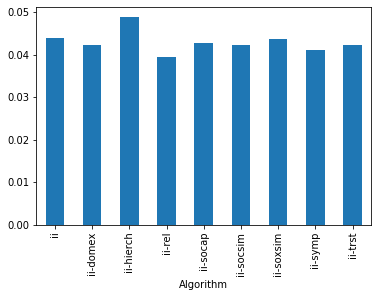

In [21]:
#set_matplotlib_formats('svg')
results100.groupby('Algorithm').ndcg.mean().plot.bar()

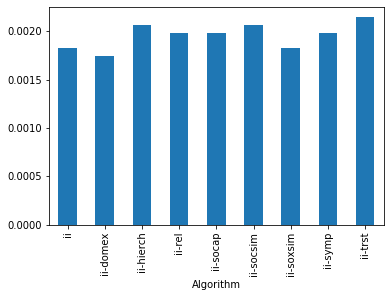

In [22]:
results100.groupby('Algorithm').precision.mean().plot.bar()

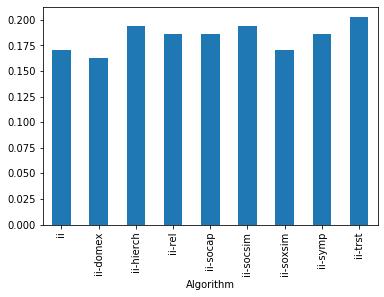

In [23]:
results100.groupby('Algorithm').recall.mean().plot.bar()

### 2. Prediction Metrics: RMSE

In [24]:
user_rmse = (preds100.groupby(['Algorithm', 'user']).apply(lambda df: rmse(df.prediction, df.rating))).dropna()
print(user_rmse.groupby('Algorithm').mean())

print(user_rmse['domex'])

plt.boxplot((user_rmse['ii'], user_rmse['trst'], user_rmse['socsim'], user_rmse['domex'], user_rmse['hierch'], user_rmse['socap'], user_rmse['soxsim'], user_rmse['symp'], user_rmse['rel']), labels= ['ii', 'trst', 'socsim', 'domex', 'hierch', 'socap', 'soxsim', 'symp', 'rel'])
plt.show()


"""
print('Item Item Knn: max rmse per user = ' + str(user_rmse_ii.max()) + ', min rmse per user = ' + str(user_rmse_ii.min()) + ', average rmse per user = ' + str(user_rmse_ii.mean()))
print('Trust: max rmse per user = ' + str(user_rmse_trst.max()) + ', min rmse per user = ' + str(user_rmse_trst.min()) + ', average rmse per user = ' + str(user_rmse_trst.mean()))
print('Social Similarity: max rmse per user = ' + str(user_rmse_socsim.max()) + ', min rmse per user = ' + str(user_rmse_socsim.min()) + ', average rmse per user = ' + str(user_rmse_socsim.mean()))
print('Domain Expertise: max rmse per user = ' + str(user_rmse_domex.max()) + ', min rmse per user = ' + str(user_rmse_domex.min()) + ', average rmse per user = ' + str(user_rmse_domex.mean()))
print('Social Hierarchy: max rmse per user = ' + str(user_rmse_hierch.max()) + ', min rmse per user = ' + str(user_rmse_hierch.min()) + ', average rmse per user = ' + str(user_rmse_hierch.mean()))
print('Social Capital: max rmse per user = ' + str(user_rmse_socap.max()) + ', min rmse per user = ' + str(user_rmse_socap.min()) + ', average rmse per user = ' + str(user_rmse_socap.mean()))
print('Social Context Similarity: max rmse per user = ' + str(user_rmse_soxsim.max()) + ', min rmse per user = ' + str(user_rmse_soxsim.min()) + ', average rmse per user = ' + str(user_rmse_soxsim.mean()))
print('Sympathy: max rmse per user = ' + str(user_rmse_symp.max()) + ', min rmse per user = ' + str(user_rmse_symp.min()) + ', average rmse per user = ' + str(user_rmse_symp.mean()))
print('Relationship: max rmse per user = ' + str(user_rmse_rel.max()) + ', min rmse per user = ' + str(user_rmse_rel.min()) + ', average rmse per user = ' + str(user_rmse_rel.mean()))


plt.boxplot((user_rmse_ii.values, user_rmse_trst.values, user_rmse_socsim.values, user_rmse_domex.values, user_rmse_hierch.values, user_rmse_socap.values, user_rmse_soxsim.values, user_rmse_symp.values, user_rmse_symp.values), labels= ['ii', 'trst', 'socsim', 'domex', 'hierch', 'socap', 'soxsim', 'symp', 'rel'])

"""

Algorithm
ii           0.324450
ii-domex     0.350207
ii-hierch    0.344811
ii-rel       0.349781
ii-socap     0.345440
ii-socsim    0.345570
ii-soxsim    0.348438
ii-symp      0.346991
ii-trst      0.349563
dtype: float64


KeyError: 'domex'